In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%; font-weight: bold}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))


# 파일 이름에서 '학번'을 자신의 학번으로, '이름'을 자신의 이름으로 고치시오.

# 문제1

바텀업(DP 테이블) 방식으로 피보나치 수열을 항을 구하는 함수를 작성하시오.

- 파라미터
    - x: 피보나치 수열의 항 번호
- 리턴
    - 피보나치 수열의 항 값

***결과***
```
2
3
9227465
```

In [36]:
def fibo_bottomup(x):
    d = [0] * (x+1)
    
    d[1] = 1
    d[2] = 1
    
    for i in range(3, x+1):
        d[i] = d[i-1] + d[i-2]
        
    return d[x]

# 아래는 수정하지 마시오.
print(fibo_bottomup(3))
print(fibo_bottomup(4))
print(fibo_bottomup(35))


2
3
9227465


# 문제2

```1로 만들기``` 문제풀이를 함수 형태로 구현하시오.

```
정수 n이 주어졌을 때, 정수 n에 사용할 수 있는 연산은 다음과 같이 4가지입니다.
    - n이 5로 나누어 떨어지면, 5로 나눕니다.
    - n이 3으로 나누어 떨어지면, 3으로 나눕니다.
    - n이 2로 나누어 떨어지면, 2로 나눕니다.
    - n에서 1을 뺍니다.

정수 n이 주어졌을 때, 연산 4개를 적절히 사용해서 값을 1로 만들고자 합니다. 연산을 사용하는 횟수의 최솟값을 리턴하시오.

```

- parameter
    - n: 정수 (1<= n <= 30000)
- return
    - 연산을 하는 횟수의 최소값

***결과***
```
3
6
```


In [3]:
def make_one(n):
    d = [0] * (n+1)
    
    for i in range(2, n+1):
        d[i] = d[i-1] + 1     # 현재 수에서 1 빼기 
        
        if i % 2 == 0:
            d[i] = min(d[i], d[i//2] + 1)
        
        if i % 3 == 0:
            d[i] = min(d[i], d[i//3] + 1)
        
        if i % 5 == 0:
            d[i] = min(d[i], d[i//5] + 1)
        
    return d[n]

print(make_one(26))
print(make_one(111))


3
6


In [46]:
# 교수님 풀이
def make_one(n):
    d = [0] * (n+1)
    
    for i in range(2, n+1):
        c = [d[i-1]] # 초기값
        
        if i % 2 == 0:
            c.append(d[i//2])
        if i % 3 == 0:
            c.append(d[i//3])
        if i % 5 == 0:
            c.append(d[i//5])
            
        d[i] = min(c) + 1
        
    return d[n]

print(make_one(26))
print(make_one(111))

3
6


# ppt 문제 1
피보나치 수열 : 탑다운 다이나믹 프로그래밍 소스코드

In [4]:
# 한 번 계산된 결과를 메모이제이션하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수를 재귀함수로 구현(탑다운 다이나믹 프로그래밍)
def fibo_topdown(x):
    if x == 1 or x == 2:
        return 1
    # 이미 계산한 적 있는 문제라면 그대로 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
    d[x] = fibo_topdown(x-1) + fibo_topdown(x-2)
    return d[x]

print(fibo_topdown(99))

218922995834555169026


# ppt 문제 2
개미 전사

[문제 설명]

- 개미 전사는 부족한 식량을 충당하고자 메뚜기 마을의 식량창고를 몰래 공격하려고 합니다. 메뚜기 마을에는 여러 개의 식량창고가 있는데 식량창고는 일직선으로 이어져 있습니다.

- 각 식량창고에는 정해진 수의 식량을 저장하고 있으며 개미 전사는 선택적으로 약탈하여 식량을 빼앗을 예정입니다. 이때 메뚜기 정찰병들은 일지선상에 존재하는 식량창고 중에서 서로 인접한 식량창고가 공격받으면 바로 알아챌 수 있습니다.

- 따라서 개미 전사가 정찰병에게 들키지 않고 식량창고를 약탈하기 위해서는 최소한 한 칸 이상 떨어진 식량창고를 약탈해야 합니다.
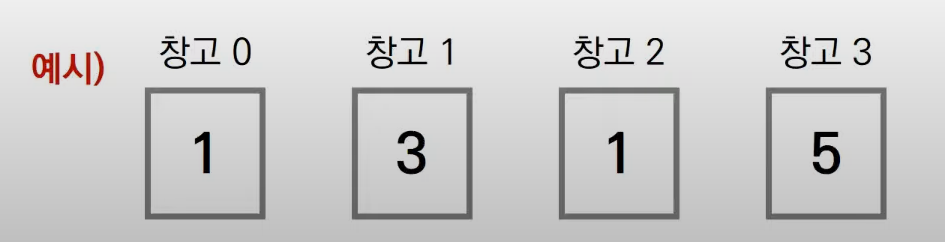

- 이때 개미 전사는 두 번째 식량창고와 네 번째 식량창고를 선택했을 때 최댓값인 총 8개의 식량을 빼앗을 수 있습니다. 개미 전사는 식량창고가 이렇게 일직선상일 때 최대한 많은 식량을 얻기를 윈합니다.

- 개미전사를 위해 식량창고 N개에 대한 정보가 주어졌을 때 얻을 수 있는 식량의 최댓값을 구하는 프로그램을 작성하시오.

[입력 조건]

- 첫째 줄에 식량창고의 개수 N이 주어집니다. (3≤N≤100)
둘째 줄에 공백을 기준으로 각 식량창고에 저장된 식량의 개수 K가 주어집니다. (0≤K≤1,000)

[출력 조건]

- 첫째 줄에 개미 전사가 얻을 수 있는 식량의 최댓값을 출력하세요.

[입력 예시 및 출력]

- 입력 예시:

    4
    
    1 3 1 5


- 출력 예시:
    
    8

In [4]:
n = int(input())
array = list(map(int, input().split()))

d = [0] * 100

d[0] = array[0]
d[1] = max(array[0], array[1])

for i in range(2, n):
    d[i] = max(d[i-1], d[i-2] + array[i])
    
print(d[n-1])

4
1 3 1 5
8
